# Insurance Claims- Fraud Detection

PROBLEM STATEMENT

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
from pylab import rcParams

In [3]:
df = pd.read_csv("https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.shape

(1000, 40)

In [7]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

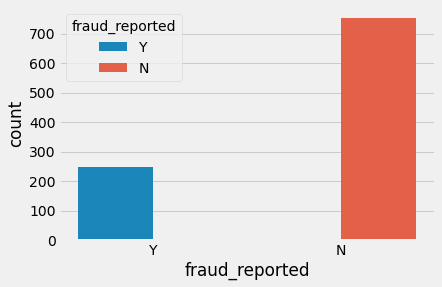

In [12]:
plt.style.use("fivethirtyeight")
ax = sns.countplot(x='fraud_reported', data=df, hue = 'fraud_reported')

In [13]:

#count for fraud and non_fraud detected
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [14]:
#a test to know the fraud around different states, hence it was deduced 
#almost a quarter of fraud was detected.

df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

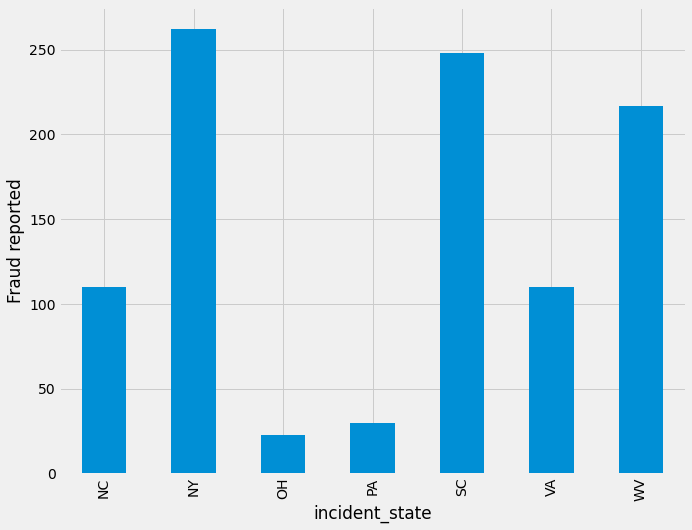

In [19]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(10,8))
ax=df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

In [20]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

data processing

In [22]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [5]:
df.describe(include= 'all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,01-01-2006,OH,250/500,NaN,NaN,NaN,NaN,...,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


In [10]:
df['csl_per_person']=df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_person']=df.policy_csl.str.split('/', expand=True)[1]

In [11]:
df['csl_per_person'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_person, dtype: object

In [12]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [14]:
df.auto_year.value_counts() #checking the difference in years of action

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [15]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [18]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [22]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [23]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'csl_per_person',
       'csl_per_accident'],
      dtype='object')

In [24]:
df._get_numeric_data().head() #checking the columns with numbers

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,NaN
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,NaN
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,NaN
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,NaN
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,NaN


In [26]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported', 'csl_per_person', 'csl_per_accident'],
      dtype='object')

/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x7fbed80edaf0> has a label of '_c39' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


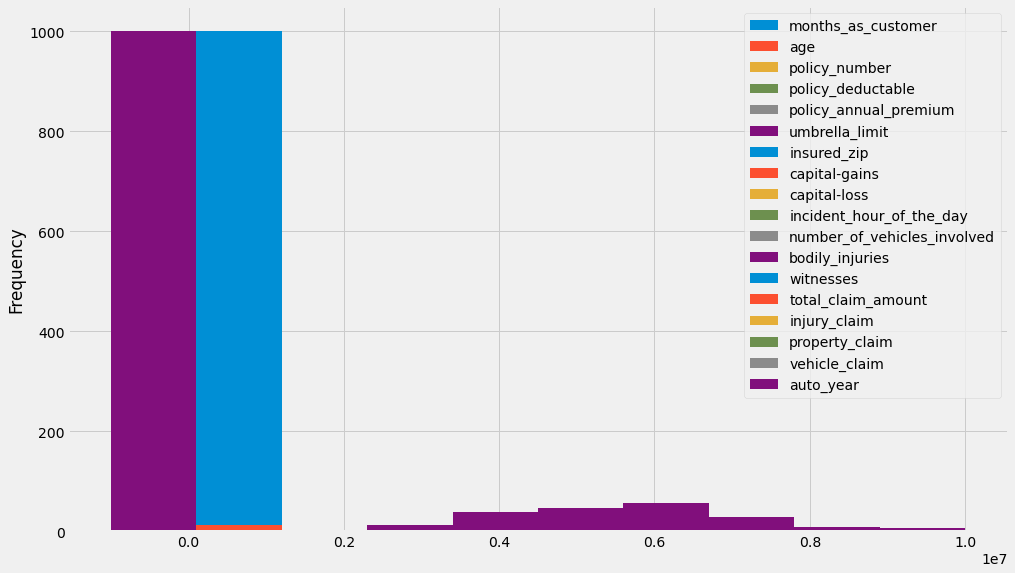

In [34]:

#generating a histogram
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [15,9]
df.plot(kind ='hist')
plt.show()

In [40]:
dummies = pd.get_dummies(df[[
    'policy_state',
    'insured_sex',
    'insured_education_level',
    'auto_make']])

dummies = dummies.join(df[[
    'collision_type',
    'property_damage',
    'police_report_available',
    'fraud_reported']])

dummies.head()

,policy_state_IL,policy_state_IN,policy_state_OH,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,collision_type,property_damage,police_report_available,fraud_reported
0,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,Side Collision,YES,YES,Y
1,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,?,?,?,Y
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,Rear Collision,NO,NO,N
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,Front Collision,?,NO,Y
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,?,NO,NO,N


In [41]:
X = dummies.iloc[:, 0:-1]
y = dummies.iloc[:,-1]

In [43]:
len(X.columns)

29

In [44]:
y.head(3)

0    Y
1    Y
2    N
Name: fraud_reported, dtype: object

In [45]:
X.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'auto_make_Accura', 'auto_make_Audi',
       'auto_make_BMW', 'auto_make_Chevrolet', 'auto_make_Dodge',
       'auto_make_Ford', 'auto_make_Honda', 'auto_make_Jeep',
       'auto_make_Mercedes', 'auto_make_Nissan', 'auto_make_Saab',
       'auto_make_Suburu', 'auto_make_Toyota', 'auto_make_Volkswagen',
       'collision_type', 'property_damage', 'police_report_available'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size =0.9, random_state =8)
print('lenghth of X_train and X_test', len(X_train), len(X_test))
print('length of y_train and y_test', len(y_train), len(y_test))

lenghth of X_train and X_test 900 100
length of y_train and y_test 900 100
